In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [287]:
df=pd.read_csv('https://raw.githubusercontent.com/matiaga/Fliprobo-Projects/main/datasets/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### 1. Problem Statement: 
### a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
### b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [288]:
# raintomorrow target variable for first case
# rainfall target variable for second case

In [289]:
df.shape

(8425, 23)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [291]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [292]:
df['Rainfall'].value_counts()

Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: count, Length: 250, dtype: int64

In [293]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     6195
Yes    1991
Name: count, dtype: int64

In [294]:
df['MinTemp'].nunique()

285

In [295]:
df['MaxTemp'].mean()

23.85997609085475

In [296]:
df['MinTemp'].mean()

13.193305389221557

In [297]:
df['Rainfall'].mean()

2.8059132559560167

In [298]:
df['Evaporation'].mean()

5.38939548137594

In [299]:
df['Sunshine'].mean()

7.632204919882645

In [300]:
df['WindGustSpeed'].mean()

40.174468657519505

In [301]:
df['WindSpeed9am'].mean()

13.847646424721523

In [302]:
df['WindSpeed3pm'].mean()

18.533661937965856

In [303]:
df['Humidity9am'].mean()

67.82249581639971

In [304]:
df['Humidity3pm'].mean()

51.2497897392767

In [305]:
df['Pressure9am'].mean()

1017.640233277122

In [306]:
df['Pressure3pm'].mean()

1015.2360747926332

In [307]:
df['Cloud9am'].mean()

4.566622251832112

In [308]:
df['Cloud3pm'].mean()

4.5031825795644895

In [309]:
df['Temp9am'].mean()

17.762014577607836

In [310]:
df['Temp3pm'].mean()

22.442934325849443

In [311]:
df['Temp3pm'].replace(np.NaN,'22.442934325849443',inplace=True)
df['Temp9am'].replace(np.NaN,'17.762014577607836',inplace=True)
df['Cloud3pm'].replace(np.NaN,'4.5031825795644895',inplace=True)
df['Cloud9am'].replace(np.NaN,'4.566622251832112',inplace=True)
df['Pressure3pm'].replace(np.NaN,'1015.2360747926332',inplace=True)
df['Pressure9am'].replace(np.NaN,'1015.2360747926332',inplace=True)
df['Humidity3pm'].replace(np.NaN,'51.2497897392767',inplace=True)
df['Humidity9am'].replace(np.NaN,'67.82249581639971',inplace=True)
df['WindSpeed3pm'].replace(np.NaN,'18.533661937965856',inplace=True)
df['WindSpeed9am'].replace(np.NaN,'13.847646424721523',inplace=True)
df['WindGustSpeed'].replace(np.NaN,'40.174468657519505',inplace=True)
df['Sunshine'].replace(np.NaN,'7.632204919882645',inplace=True)
df['Evaporation'].replace(np.NaN,'5.38939548137594',inplace=True)
df['Rainfall'].replace(np.NaN,'2.8059132559560167',inplace=True)
df['MinTemp'].replace(np.NaN,'13.193305389221557',inplace=True)
df['MaxTemp'].replace(np.NaN,'23.86',inplace=True)

In [312]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.38939548137594,7.632204919882645,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,4.5031825795644895,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.38939548137594,7.632204919882645,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622251832112,4.5031825795644895,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.38939548137594,7.632204919882645,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622251832112,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.38939548137594,7.632204919882645,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622251832112,4.5031825795644895,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.38939548137594,7.632204919882645,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,5.38939548137594,7.632204919882645,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.566622251832112,4.5031825795644895,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,5.38939548137594,7.632204919882645,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.566622251832112,4.5031825795644895,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.38939548137594,7.632204919882645,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.566622251832112,4.5031825795644895,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,5.38939548137594,7.632204919882645,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [313]:
df['MaxTemp'].value_counts()

MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: count, Length: 332, dtype: int64

In [314]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [315]:
df.dropna(inplace=True)

In [316]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.38939548137594,7.632204919882645,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,4.5031825795644895,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.38939548137594,7.632204919882645,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622251832112,4.5031825795644895,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.38939548137594,7.632204919882645,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622251832112,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.38939548137594,7.632204919882645,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622251832112,4.5031825795644895,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.38939548137594,7.632204919882645,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,5.38939548137594,7.632204919882645,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.566622251832112,4.5031825795644895,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,5.38939548137594,7.632204919882645,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.566622251832112,4.5031825795644895,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,5.38939548137594,7.632204919882645,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.566622251832112,4.5031825795644895,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,5.38939548137594,7.632204919882645,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.566622251832112,4.5031825795644895,12.5,26.1,No,No


In [317]:
df.drop('Date',axis=1,inplace=True)

In [318]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.38939548137594,7.632204919882645,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,4.5031825795644895,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.38939548137594,7.632204919882645,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622251832112,4.5031825795644895,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.38939548137594,7.632204919882645,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622251832112,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.38939548137594,7.632204919882645,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622251832112,4.5031825795644895,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.38939548137594,7.632204919882645,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,Uluru,3.5,21.8,0.0,5.38939548137594,7.632204919882645,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.566622251832112,4.5031825795644895,9.4,20.9,No,No
8420,Uluru,2.8,23.4,0.0,5.38939548137594,7.632204919882645,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622251832112,4.5031825795644895,10.1,22.4,No,No
8421,Uluru,3.6,25.3,0.0,5.38939548137594,7.632204919882645,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622251832112,4.5031825795644895,10.9,24.5,No,No
8422,Uluru,5.4,26.9,0.0,5.38939548137594,7.632204919882645,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622251832112,4.5031825795644895,12.5,26.1,No,No


In [319]:
from sklearn.preprocessing import LabelEncoder

In [320]:
le=LabelEncoder()

In [321]:
df['Location']=le.fit_transform(df.Location)

In [323]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,5.38939548137594,7.632204919882645,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,4.5031825795644895,16.9,21.8,No,No
1,1,7.4,25.1,0.0,5.38939548137594,7.632204919882645,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622251832112,4.5031825795644895,17.2,24.3,No,No
2,1,12.9,25.7,0.0,5.38939548137594,7.632204919882645,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622251832112,2.0,21.0,23.2,No,No
3,1,9.2,28.0,0.0,5.38939548137594,7.632204919882645,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622251832112,4.5031825795644895,18.1,26.5,No,No
4,1,17.5,32.3,1.0,5.38939548137594,7.632204919882645,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,0.0,5.38939548137594,7.632204919882645,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.566622251832112,4.5031825795644895,9.4,20.9,No,No
8420,8,2.8,23.4,0.0,5.38939548137594,7.632204919882645,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.566622251832112,4.5031825795644895,10.1,22.4,No,No
8421,8,3.6,25.3,0.0,5.38939548137594,7.632204919882645,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.566622251832112,4.5031825795644895,10.9,24.5,No,No
8422,8,5.4,26.9,0.0,5.38939548137594,7.632204919882645,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.566622251832112,4.5031825795644895,12.5,26.1,No,No


In [324]:
df['WindGustDir']=le.fit_transform(df.WindGustDir)
df['WindDir9am']=le.fit_transform(df.WindDir9am)
df['WindDir3pm']=le.fit_transform(df.WindDir3pm)
df['RainToday']=le.fit_transform(df.RainToday)
df['RainTomorrow']=le.fit_transform(df.RainTomorrow)

In [325]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,5.38939548137594,7.632204919882645,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,4.5031825795644895,16.9,21.8,0,0
1,1,7.4,25.1,0.0,5.38939548137594,7.632204919882645,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.566622251832112,4.5031825795644895,17.2,24.3,0,0
2,1,12.9,25.7,0.0,5.38939548137594,7.632204919882645,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.566622251832112,2.0,21.0,23.2,0,0
3,1,9.2,28.0,0.0,5.38939548137594,7.632204919882645,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.566622251832112,4.5031825795644895,18.1,26.5,0,0
4,1,17.5,32.3,1.0,5.38939548137594,7.632204919882645,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,0.0,5.38939548137594,7.632204919882645,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,4.566622251832112,4.5031825795644895,9.4,20.9,0,0
8420,8,2.8,23.4,0.0,5.38939548137594,7.632204919882645,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,4.566622251832112,4.5031825795644895,10.1,22.4,0,0
8421,8,3.6,25.3,0.0,5.38939548137594,7.632204919882645,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,4.566622251832112,4.5031825795644895,10.9,24.5,0,0
8422,8,5.4,26.9,0.0,5.38939548137594,7.632204919882645,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,4.566622251832112,4.5031825795644895,12.5,26.1,0,0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8423
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       6716 non-null   int32 
 1   MinTemp        6716 non-null   object
 2   MaxTemp        6716 non-null   object
 3   Rainfall       6716 non-null   object
 4   Evaporation    6716 non-null   object
 5   Sunshine       6716 non-null   object
 6   WindGustDir    6716 non-null   int32 
 7   WindGustSpeed  6716 non-null   object
 8   WindDir9am     6716 non-null   int32 
 9   WindDir3pm     6716 non-null   int32 
 10  WindSpeed9am   6716 non-null   object
 11  WindSpeed3pm   6716 non-null   object
 12  Humidity9am    6716 non-null   object
 13  Humidity3pm    6716 non-null   object
 14  Pressure9am    6716 non-null   object
 15  Pressure3pm    6716 non-null   object
 16  Cloud9am       6716 non-null   object
 17  Cloud3pm       6716 non-null   object
 18  Temp9am        6716 non-null   ob

In [328]:
df['MinTemp']=df['MinTemp'].astype(float)
df['MaxTemp']=df['MaxTemp'].astype(float)
df['Rainfall']=df['Rainfall'].astype(float)
df['Evaporation']=df['Evaporation'].astype(float)
df['Sunshine']=df['Sunshine'].astype(float)
df['WindGustSpeed']=df['WindGustSpeed'].astype(float)
df['WindSpeed9am']=df['WindSpeed9am'].astype(float)
df['WindSpeed3pm']=df['WindSpeed3pm'].astype(float)
df['Humidity9am']=df['Humidity9am'].astype(float)
df['Humidity3pm']=df['Humidity3pm'].astype(float)
df['Pressure9am']=df['Pressure9am'].astype(float)
df['Pressure3pm']=df['Pressure3pm'].astype(float)
df['Cloud9am']=df['Cloud9am'].astype(float)
df['Cloud3pm']=df['Cloud3pm'].astype(float)
df['Temp9am']=df['Temp9am'].astype(float)
df['Temp3pm']=df['Temp3pm'].astype(float)


Location            Axes(0.125,0.653529;0.0824468x0.226471)
MinTemp          Axes(0.223936,0.653529;0.0824468x0.226471)
MaxTemp          Axes(0.322872,0.653529;0.0824468x0.226471)
Rainfall         Axes(0.421809,0.653529;0.0824468x0.226471)
Evaporation      Axes(0.520745,0.653529;0.0824468x0.226471)
Sunshine         Axes(0.619681,0.653529;0.0824468x0.226471)
WindGustDir      Axes(0.718617,0.653529;0.0824468x0.226471)
WindGustSpeed    Axes(0.817553,0.653529;0.0824468x0.226471)
WindDir9am          Axes(0.125,0.381765;0.0824468x0.226471)
WindDir3pm       Axes(0.223936,0.381765;0.0824468x0.226471)
WindSpeed9am     Axes(0.322872,0.381765;0.0824468x0.226471)
WindSpeed3pm     Axes(0.421809,0.381765;0.0824468x0.226471)
Humidity9am      Axes(0.520745,0.381765;0.0824468x0.226471)
Humidity3pm      Axes(0.619681,0.381765;0.0824468x0.226471)
Pressure9am      Axes(0.718617,0.381765;0.0824468x0.226471)
Pressure3pm      Axes(0.817553,0.381765;0.0824468x0.226471)
Cloud9am                Axes(0.125,0.11;

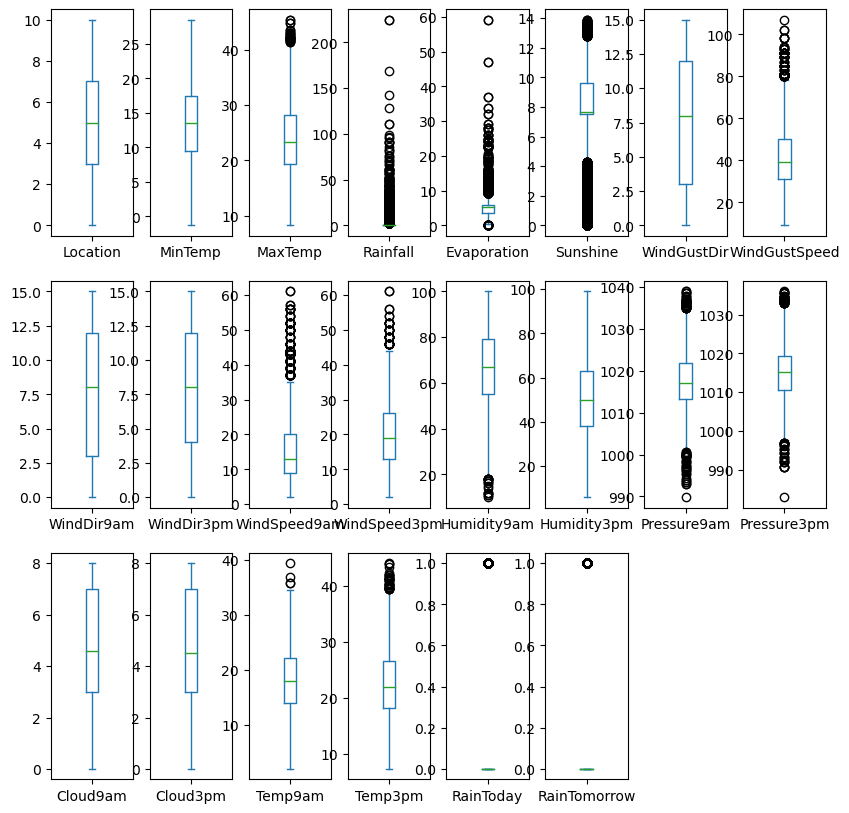

In [329]:
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,10))

In [330]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,...,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000
mean,5.369863,13.455803,24.032207,2.785468,5.387516,7.695648,7.746724,40.844253,7.713073,7.775908,...,66.347178,50.711584,1017.416352,1015.155205,4.574556,4.507060,18.076314,22.590513,0.246575,0.244044
std,2.878044,5.322438,6.203860,9.460671,3.330233,3.018111,4.740883,14.378932,4.677764,4.647448,...,16.728248,18.567562,6.609328,6.519493,2.406493,2.324461,5.563885,6.035226,0.431049,0.429551
min,0.000000,-1.300000,8.200000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,3.000000,9.500000,19.400000,0.000000,3.600000,7.500000,3.000000,31.000000,3.000000,4.000000,...,55.000000,38.000000,1013.300000,1010.600000,3.000000,3.000000,14.000000,18.200000,0.000000,0.000000
50%,5.000000,13.500000,23.400000,0.000000,5.389395,7.632205,8.000000,39.000000,8.000000,8.000000,...,67.000000,50.000000,1017.100000,1015.236075,4.566622,4.503183,18.000000,22.000000,0.000000,0.000000
75%,7.000000,17.500000,28.200000,1.000000,5.800000,9.600000,12.000000,50.000000,12.000000,12.000000,...,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,22.200000,26.600000,0.000000,0.000000
max,10.000000,28.500000,45.500000,225.000000,59.200000,13.900000,15.000000,107.000000,15.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8423
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6716 non-null   int32  
 1   MinTemp        6716 non-null   float64
 2   MaxTemp        6716 non-null   float64
 3   Rainfall       6716 non-null   float64
 4   Evaporation    6716 non-null   float64
 5   Sunshine       6716 non-null   float64
 6   WindGustDir    6716 non-null   int32  
 7   WindGustSpeed  6716 non-null   float64
 8   WindDir9am     6716 non-null   int32  
 9   WindDir3pm     6716 non-null   int32  
 10  WindSpeed9am   6716 non-null   float64
 11  WindSpeed3pm   6716 non-null   float64
 12  Humidity9am    6716 non-null   float64
 13  Humidity3pm    6716 non-null   float64
 14  Pressure9am    6716 non-null   float64
 15  Pressure3pm    6716 non-null   float64
 16  Cloud9am       6716 non-null   float64
 17  Cloud3pm       6716 non-null   float64
 18  Temp9am      

In [332]:
from scipy.stats import zscore

In [333]:
z=np.abs(zscore(df))

In [334]:
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.518458,0.010485,0.182514,0.231023,0.000564,0.021022,1.108162,0.219487,1.130309,1.339349,...,0.278162,1.546445,1.470206,1.235649,1.423523,0.001668,0.211435,0.130993,0.572078,0.56818
1,1.518458,1.137872,0.172130,0.294448,0.000564,0.021022,1.319109,0.219487,0.366244,1.554537,...,1.335994,1.384861,1.031400,1.128271,0.003297,0.001668,0.157512,0.283273,0.572078,0.56818
2,1.518458,0.104434,0.268852,0.294448,0.000564,0.021022,1.530056,0.358589,1.130309,1.554537,...,1.694696,1.115554,1.485338,0.990213,0.003297,1.078636,0.525515,0.100996,0.572078,0.56818
3,1.518458,0.799656,0.639616,0.294448,0.000564,0.021022,0.790360,1.171541,0.275136,1.673281,...,1.276211,1.869614,0.027788,0.361283,0.003297,0.001668,0.004257,0.647826,0.572078,0.56818
4,1.518458,0.759896,1.332784,0.188739,0.000564,0.021022,1.108162,0.010832,1.435210,0.166966,...,0.935782,0.953970,1.001137,1.404386,1.007950,1.502800,0.049666,1.178086,0.572078,0.56818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,0.913931,1.870674,0.359836,0.294448,0.000564,0.021022,1.634147,0.684681,1.221417,1.673281,...,0.439241,1.277139,1.102108,0.927257,0.003297,0.001668,1.559515,0.280129,0.572078,0.56818
8420,0.913931,2.002202,0.101913,0.294448,0.000564,0.021022,1.634147,0.684681,0.275136,1.458093,...,0.917509,1.438723,1.086976,0.789199,0.003297,0.001668,1.433694,0.031569,0.572078,0.56818
8421,0.913931,1.851884,0.204371,0.294448,0.000564,0.021022,0.368466,1.310644,0.275136,1.027718,...,0.618591,1.600307,0.920533,0.605122,0.003297,0.001668,1.289899,0.316414,0.572078,0.56818
8422,0.913931,1.513668,0.462294,0.294448,0.000564,0.021022,1.001307,0.267373,0.275136,1.339349,...,0.797942,1.438723,0.542251,0.252308,0.003297,0.001668,1.002308,0.581544,0.572078,0.56818


In [335]:
threshod=3
print(np.where(z>3))

(array([  12,   12,   41,   41,   49,   49,   57,   57,   58,   58,   59,
         59,   62,   63,   63,  104,  200,  305,  305,  327,  328,  329,
        351,  369,  432,  523,  523,  524,  537,  551,  586,  606,  629,
        630,  635,  727,  740,  769,  770,  770,  770,  791,  792,  794,
        916,  948,  961,  962,  996, 1000, 1023, 1024, 1114, 1115, 1168,
       1169, 1170, 1230, 1231, 1232, 1263, 1324, 1376, 1410, 1410, 1424,
       1470, 1540, 1541, 1577, 1646, 1653, 1653, 1658, 1662, 1666, 1672,
       1680, 1686, 1693, 1694, 1699, 1700, 1702, 1706, 1710, 1712, 1719,
       1725, 1733, 1739, 1747, 1753, 1761, 1767, 1771, 1785, 1798, 1837,
       1843, 1851, 1851, 1858, 1859, 1859, 1859, 1860, 1862, 1874, 1874,
       1874, 1881, 1881, 1891, 1891, 1893, 1932, 1935, 1939, 1951, 1958,
       1972, 1976, 1984, 1990, 1995, 2011, 2022, 2033, 2033, 2034, 2051,
       2077, 2088, 2142, 2144, 2153, 2166, 2169, 2169, 2169, 2169, 2170,
       2170, 2178, 2191, 2211, 2233, 2274, 2286, 2

In [336]:
df_new=df[(z<3).all(axis=1)]

In [376]:
df_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,0.0,5.389395,7.632205,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0
8420,8,2.8,23.4,0.0,5.389395,7.632205,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,8,3.6,25.3,0.0,5.389395,7.632205,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,8,5.4,26.9,0.0,5.389395,7.632205,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


<Axes: >

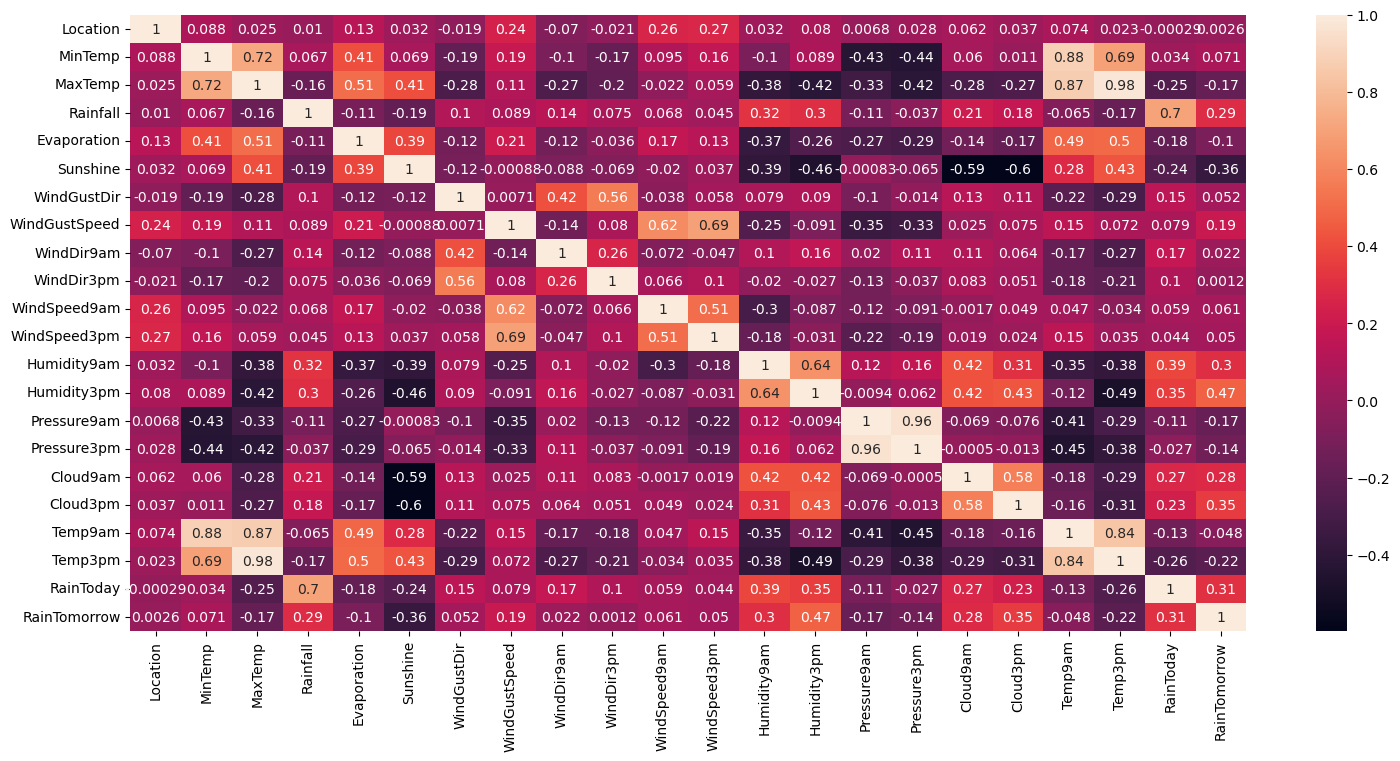

In [386]:
plt.figure(figsize=(18,8))
sns.heatmap(df_new.corr(),annot=True)

# training for raintomorrow prediction

In [338]:
x=df.iloc[:,0:-1]

In [339]:
y=df.iloc[:,-1]

In [340]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,0.0,5.389395,7.632205,0,31.0,2,0,...,13.0,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0
8420,8,2.8,23.4,0.0,5.389395,7.632205,0,31.0,9,1,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0
8421,8,3.6,25.3,0.0,5.389395,7.632205,6,22.0,9,3,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0
8422,8,5.4,26.9,0.0,5.389395,7.632205,3,37.0,9,14,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0


In [341]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 6716, dtype: int32

In [342]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [343]:
lg=LogisticRegression()

In [344]:
lg.fit(x_train,y_train)

LogisticRegression()

In [345]:
pred=lg.predict(x_test)

In [346]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [347]:
print(accuracy_score(y_test,pred))

0.8486352357320099


In [348]:
print(confusion_matrix(y_test,pred))

[[1439   94]
 [ 211  271]]


In [349]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1533
           1       0.74      0.56      0.64       482

    accuracy                           0.85      2015
   macro avg       0.81      0.75      0.77      2015
weighted avg       0.84      0.85      0.84      2015



# prediction model for rainfall

In [375]:
df

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,5.389395,7.632205,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,5.389395,7.632205,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,5.389395,7.632205,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,5.389395,7.632205,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,5.389395,7.632205,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,5.389395,7.632205,0,31.0,2,0,15.0,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0
8420,8,2.8,23.4,5.389395,7.632205,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,8,3.6,25.3,5.389395,7.632205,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,8,5.4,26.9,5.389395,7.632205,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


In [351]:
y1=df.iloc[:,3]

In [352]:
y1

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8419    0.0
8420    0.0
8421    0.0
8422    0.0
8423    0.0
Name: Rainfall, Length: 6716, dtype: float64

In [353]:
df.drop(columns='Rainfall',axis=1,inplace=True)

In [354]:
df

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,5.389395,7.632205,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,5.389395,7.632205,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,5.389395,7.632205,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,5.389395,7.632205,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,5.389395,7.632205,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,5.389395,7.632205,0,31.0,2,0,15.0,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0
8420,8,2.8,23.4,5.389395,7.632205,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,8,3.6,25.3,5.389395,7.632205,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,8,5.4,26.9,5.389395,7.632205,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


In [355]:
x1=df.iloc[:,:]

In [356]:
x1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,5.389395,7.632205,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,5.389395,7.632205,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,5.389395,7.632205,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,5.389395,7.632205,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,5.389395,7.632205,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8,3.5,21.8,5.389395,7.632205,0,31.0,2,0,15.0,...,59.0,27.0,1024.7,1021.2,4.566622,4.503183,9.4,20.9,0,0
8420,8,2.8,23.4,5.389395,7.632205,0,31.0,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,8,3.6,25.3,5.389395,7.632205,6,22.0,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,8,5.4,26.9,5.389395,7.632205,3,37.0,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0


In [357]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.4,random_state=42)

In [359]:
x1_train.shape

(4029, 21)

In [360]:
y1_train.shape

(4029,)

In [366]:
ln=LinearRegression()

In [367]:
ln.fit(x1_train,y1_train)

LinearRegression()

In [369]:
pred=ln.predict(x1_test)

In [370]:
pred

array([-1.53825389, -2.22349077, -0.6864642 , ...,  0.16058779,
       -0.38311305, -1.0344893 ])

In [374]:
print(ln.score(x1_train,y1_train))

0.2766961736549788
